In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [4]:
dataset= pd.read_csv('churn_data.csv')

In [5]:
dataset.shape

(27000, 31)

In [6]:
dataset.head()

,user,churn,age,housing,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,cc_disliked,cc_liked,cc_application_begin,app_downloaded,web_user,app_web_user,ios_user,android_user,registered_phones,payment_type,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,zodiac_sign,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred
0,55409,0,37.0,na,NaN,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,Bi-Weekly,0,0,0,0,Leo,1,0,NaN,0.00,0
1,23547,0,28.0,R,486.0,0,0,1,0,0,96,0,0,5,1,1,1,1,0,0,Weekly,0,0,0,0,Leo,0,0,44.0,1.47,1
2,58313,0,35.0,R,561.0,47,2,86,47,0,285,0,0,9,1,0,0,0,1,2,Semi-Monthly,0,0,0,0,Capricorn,1,0,65.0,2.17,0
3,8095,0,26.0,R,567.0,26,3,38,25,0,74,0,0,26,1,0,0,0,1,0,Bi-Weekly,0,0,0,0,Capricorn,0,0,33.0,1.10,1
4,61353,1,27.0,na,NaN,0,0,2,0,0,0,0,0,0,1,1,1,0,1,0,Bi-Weekly,0,0,0,0,Aries,1,0,1.0,0.03,0


In [7]:
dataset.columns

Index(['user', 'churn', 'age', 'housing', 'credit_score', 'deposits',
       'withdrawal', 'purchases_partners', 'purchases', 'cc_taken',
       'cc_recommended', 'cc_disliked', 'cc_liked', 'cc_application_begin',
       'app_downloaded', 'web_user', 'app_web_user', 'ios_user',
       'android_user', 'registered_phones', 'payment_type', 'waiting_4_loan',
       'cancelled_loan', 'received_loan', 'rejected_loan', 'zodiac_sign',
       'left_for_two_month_plus', 'left_for_one_month', 'rewards_earned',
       'reward_rate', 'is_referred'],
      dtype='object')

In [8]:
dataset.describe()

,user,churn,age,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,cc_disliked,cc_liked,cc_application_begin,app_downloaded,web_user,app_web_user,ios_user,android_user,registered_phones,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred
count,27000.000000,27000.000000,26996.000000,18969.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,23773.000000,27000.000000,27000.000000
mean,35422.702519,0.413852,32.219921,542.944225,3.341556,0.307000,28.062519,3.273481,0.073778,92.625778,0.050630,0.013111,8.197852,0.952481,0.606074,0.561741,0.393926,0.587259,0.420926,0.001296,0.018815,0.018185,0.004889,0.173444,0.018074,29.110125,0.907684,0.318037
std,20321.006678,0.492532,9.964838,61.059315,9.131406,1.055416,42.219686,8.953077,0.437299,88.869343,0.871366,0.238158,12.497243,0.212749,0.488628,0.496183,0.488628,0.492336,0.912831,0.035981,0.135873,0.133623,0.069751,0.378638,0.133222,21.973478,0.752016,0.465723
min,1.000000,0.000000,17.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,17810.500000,0.000000,25.000000,507.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.200000,0.000000
50%,35749.000000,0.000000,30.000000,542.000000,0.000000,0.000000,9.000000,0.000000,0.000000,65.000000,0.000000,0.000000,4.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.000000,0.780000,0.000000
75%,53244.250000,1.000000,37.000000,578.000000,1.000000,0.000000,43.000000,1.000000,0.000000,164.000000,0.000000,0.000000,11.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,48.000000,1.530000,1.000000
max,69658.000000,1.000000,91.000000,838.000000,65.000000,29.000000,1067.000000,63.000000,29.000000,522.000000,65.000000,27.000000,263.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,114.000000,4.000000,1.000000


In [9]:
dataset.isnull().sum()

user                          0
churn                         0
age                           4
housing                       0
credit_score               8031
deposits                      0
withdrawal                    0
purchases_partners            0
purchases                     0
cc_taken                      0
cc_recommended                0
cc_disliked                   0
cc_liked                      0
cc_application_begin          0
app_downloaded                0
web_user                      0
app_web_user                  0
ios_user                      0
android_user                  0
registered_phones             0
payment_type                  0
waiting_4_loan                0
cancelled_loan                0
received_loan                 0
rejected_loan                 0
zodiac_sign                   0
left_for_two_month_plus       0
left_for_one_month            0
rewards_earned             3227
reward_rate                   0
is_referred                   0
dtype: i

In [10]:
dataset= dataset[pd.notnull(dataset['age'])]

In [11]:
dataset.shape

(26996, 31)

In [12]:
dataset= dataset.drop(columns= ['credit_score', 'rewards_earned'])

In [13]:
#Data Visualisation
#Histograms
dataset2=  dataset.drop(columns= ['user', 'churn'])

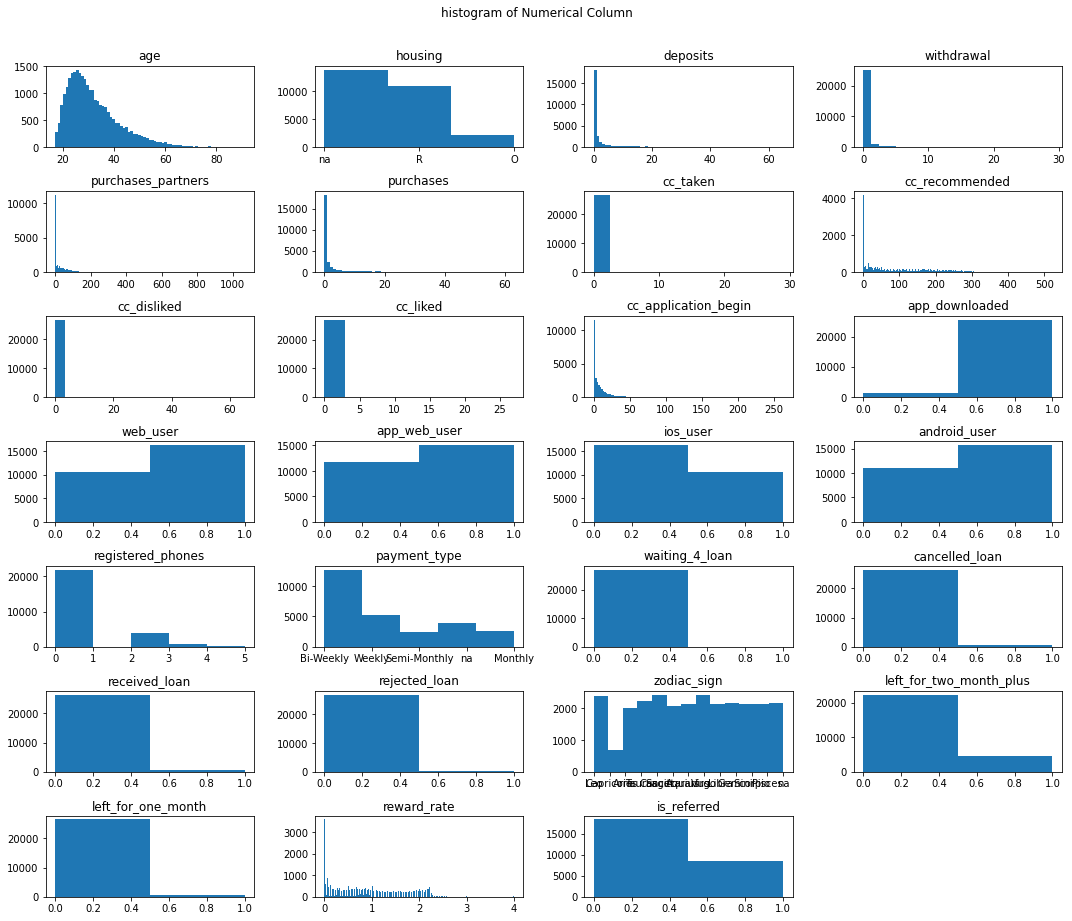

In [14]:
#histograms
plt.figure(figsize=(15, 15))
plt.suptitle("histogram of Numerical Column")
for i in range(1, dataset2.shape[1]+1):
  plt.subplot(8, 4, i)
  f= plt.gca()
  f.set_title(dataset2.columns[i-1])

  val= np.size(dataset2.iloc[:, i-1].unique())
  plt.hist(dataset2.iloc[:, i-1], bins= val)
plt.tight_layout(rect= [0, 0.03, 1, 0.95])

In [15]:
dataset2.keys()

Index(['age', 'housing', 'deposits', 'withdrawal', 'purchases_partners',
       'purchases', 'cc_taken', 'cc_recommended', 'cc_disliked', 'cc_liked',
       'cc_application_begin', 'app_downloaded', 'web_user', 'app_web_user',
       'ios_user', 'android_user', 'registered_phones', 'payment_type',
       'waiting_4_loan', 'cancelled_loan', 'received_loan', 'rejected_loan',
       'zodiac_sign', 'left_for_two_month_plus', 'left_for_one_month',
       'reward_rate', 'is_referred'],
      dtype='object')

In [16]:
obj_col= ['housing', 'cc_application_begin', 'app_downloaded', 'web_user', 'app_web_user',
       'ios_user', 'android_user', 'registered_phones', 'payment_type',
       'waiting_4_loan', 'cancelled_loan', 'received_loan', 'rejected_loan',
       'zodiac_sign', 'left_for_two_month_plus', 'left_for_one_month', 'is_referred']

In [17]:
dataset2= dataset[obj_col]

In [18]:
dataset2.head()

,housing,cc_application_begin,app_downloaded,web_user,app_web_user,ios_user,android_user,registered_phones,payment_type,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,zodiac_sign,left_for_two_month_plus,left_for_one_month,is_referred
0,na,0,1,1,1,1,0,0,Bi-Weekly,0,0,0,0,Leo,1,0,0
1,R,5,1,1,1,1,0,0,Weekly,0,0,0,0,Leo,0,0,1
2,R,9,1,0,0,0,1,2,Semi-Monthly,0,0,0,0,Capricorn,1,0,0
3,R,26,1,0,0,0,1,0,Bi-Weekly,0,0,0,0,Capricorn,0,0,1
4,na,0,1,1,1,0,1,0,Bi-Weekly,0,0,0,0,Aries,1,0,0


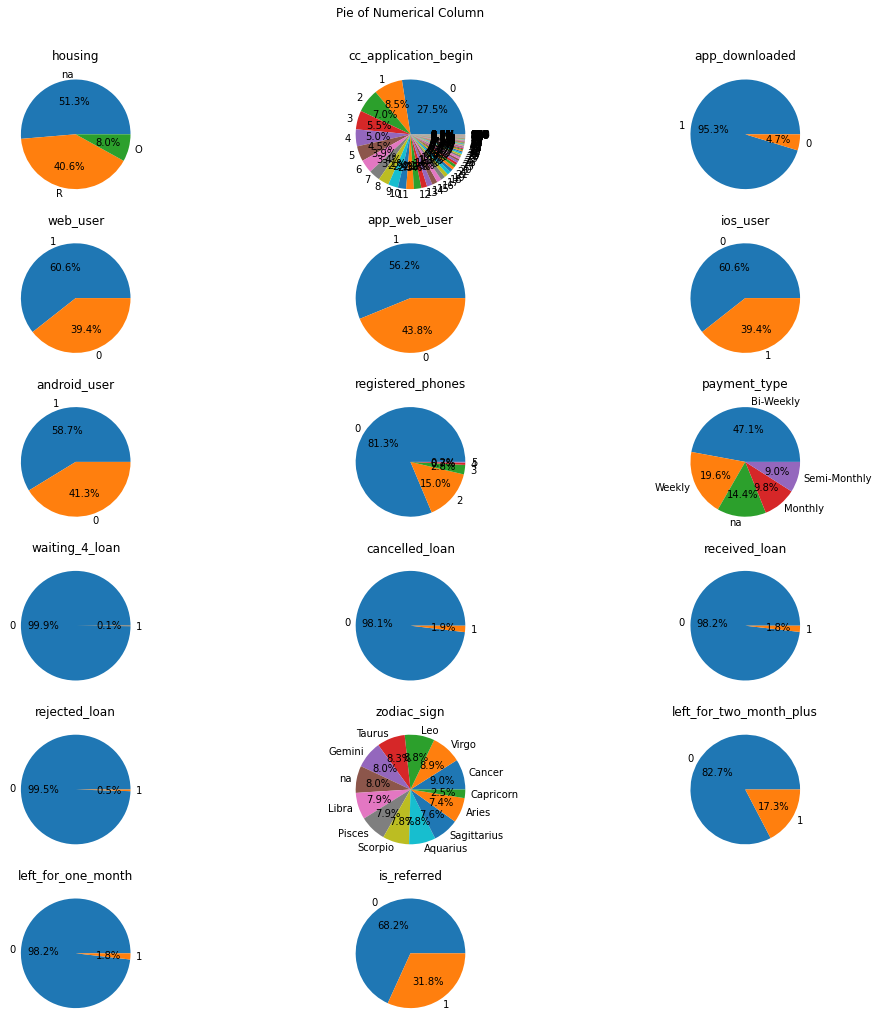

In [19]:
#Pie Chart for Binary Columns
plt.figure(figsize=(15, 15))
plt.suptitle("Pie of Numerical Column")
for i in range(1, dataset2.shape[1]+1):
  plt.subplot(6, 3, i)
  f= plt.gca()
  f.set_title(dataset2.columns[i-1])
  values= dataset2.iloc[:, i-1].value_counts(normalize= True).values
  index= dataset2.iloc[:, i-1].value_counts(normalize= True).index
  plt.pie(values, labels= index, autopct= '%1.1f%%')
plt.tight_layout(rect= [0, 0.03, 1, 0.95])

In [20]:
dataset[dataset2.waiting_4_loan==1].churn.value_counts()

0    27
1     8
Name: churn, dtype: int64

In [21]:
dataset[dataset2.cancelled_loan==1].churn.value_counts()

1    274
0    234
Name: churn, dtype: int64

In [22]:
dataset[dataset2.received_loan==1].churn.value_counts()

1    292
0    199
Name: churn, dtype: int64

In [23]:
dataset[dataset2.rejected_loan==1].churn.value_counts()

1    107
0     25
Name: churn, dtype: int64

In [24]:
dataset[dataset2.left_for_one_month==1].churn.value_counts()

1    266
0    222
Name: churn, dtype: int64

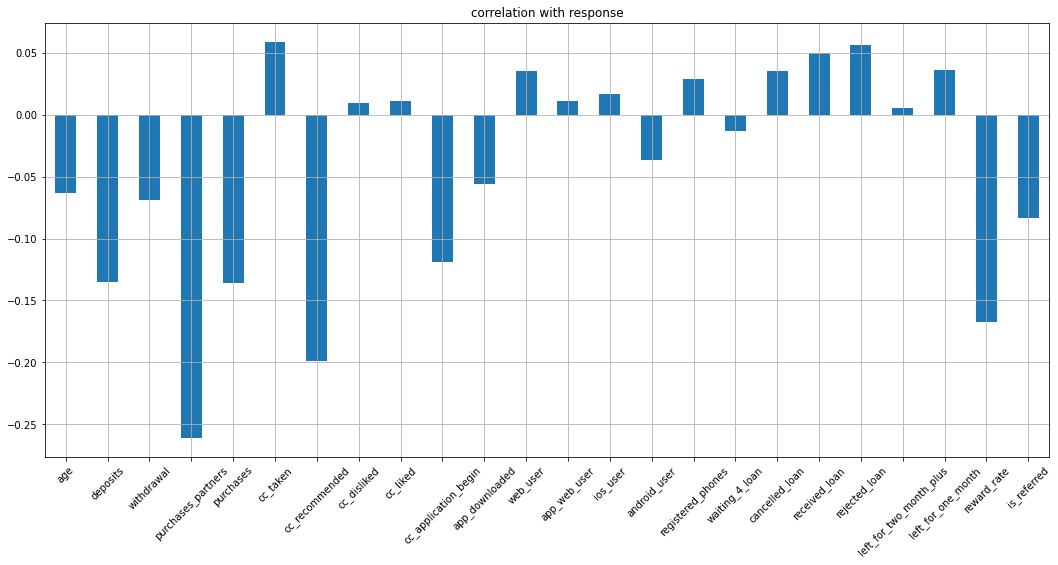

In [25]:
dataset.drop(columns= ['churn', 'user', 'housing',
                       'payment_type', 'zodiac_sign']).corrwith(dataset.churn).plot.bar(
                           figsize= (18,8), title= 'correlation with response', fontsize= 10,
                           rot= 45, grid= True
                       )

In [26]:
# Correlation Matrix
corr= dataset.drop(columns=['user', 'churn']).corr()

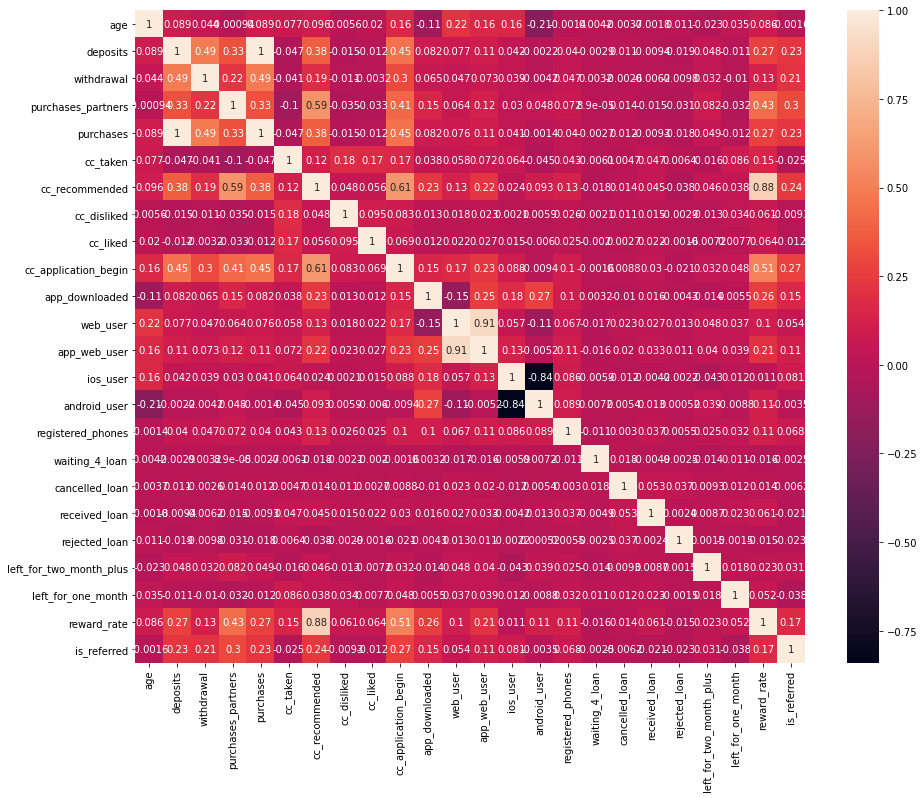

In [37]:
plt.figure(figsize= (15, 12))
sns.heatmap(corr, annot= True)

In [38]:
dataset= dataset.drop(columns= 'app_web_user')

In [39]:
dataset.shape

(26996, 28)

In [40]:
dataset.to_csv('new_churn_data.csv', index= False)

In [41]:
dataset.head()

,user,churn,age,housing,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,cc_disliked,cc_liked,cc_application_begin,app_downloaded,web_user,ios_user,android_user,registered_phones,payment_type,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,zodiac_sign,left_for_two_month_plus,left_for_one_month,reward_rate,is_referred
0,55409,0,37.0,na,0,0,0,0,0,0,0,0,0,1,1,1,0,0,Bi-Weekly,0,0,0,0,Leo,1,0,0.00,0
1,23547,0,28.0,R,0,0,1,0,0,96,0,0,5,1,1,1,0,0,Weekly,0,0,0,0,Leo,0,0,1.47,1
2,58313,0,35.0,R,47,2,86,47,0,285,0,0,9,1,0,0,1,2,Semi-Monthly,0,0,0,0,Capricorn,1,0,2.17,0
3,8095,0,26.0,R,26,3,38,25,0,74,0,0,26,1,0,0,1,0,Bi-Weekly,0,0,0,0,Capricorn,0,0,1.10,1
4,61353,1,27.0,na,0,0,2,0,0,0,0,0,0,1,1,0,1,0,Bi-Weekly,0,0,0,0,Aries,1,0,0.03,0


In [42]:
user_identifier= dataset['user']

In [43]:
dataset= dataset.drop(columns= 'user')

In [44]:
dataset.housing.value_counts()

na    13856
R     10969
O      2171
Name: housing, dtype: int64

In [45]:
dataset= pd.get_dummies(dataset)

In [47]:
dataset.columns

Index(['churn', 'age', 'deposits', 'withdrawal', 'purchases_partners',
       'purchases', 'cc_taken', 'cc_recommended', 'cc_disliked', 'cc_liked',
       'cc_application_begin', 'app_downloaded', 'web_user', 'ios_user',
       'android_user', 'registered_phones', 'waiting_4_loan', 'cancelled_loan',
       'received_loan', 'rejected_loan', 'left_for_two_month_plus',
       'left_for_one_month', 'reward_rate', 'is_referred', 'housing_O',
       'housing_R', 'housing_na', 'payment_type_Bi-Weekly',
       'payment_type_Monthly', 'payment_type_Semi-Monthly',
       'payment_type_Weekly', 'payment_type_na', 'zodiac_sign_Aquarius',
       'zodiac_sign_Aries', 'zodiac_sign_Cancer', 'zodiac_sign_Capricorn',
       'zodiac_sign_Gemini', 'zodiac_sign_Leo', 'zodiac_sign_Libra',
       'zodiac_sign_Pisces', 'zodiac_sign_Sagittarius', 'zodiac_sign_Scorpio',
       'zodiac_sign_Taurus', 'zodiac_sign_Virgo', 'zodiac_sign_na'],
      dtype='object')

In [48]:
dataset= dataset.drop(columns= ['housing_na', 'payment_type_na', 'zodiac_sign_na'])

In [77]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(dataset.drop(columns= 'churn'), dataset['churn'], test_size= 0.2, random_state= 0)

In [78]:
X_train.shape

(21596, 41)

In [79]:
y_train.value_counts()

0    12656
1     8940
Name: churn, dtype: int64

In [80]:
#Balancing the dataset
pos_index= y_train[y_train.values==1].index
neg_index= y_train[y_train.values==0].index

In [81]:
if(len(pos_index)> len(neg_index)):
  higher= pos_index
  lower= neg_index
else:
  lower= pos_index
  higher= neg_index

In [82]:
import random
random.seed(0)
higher= np.random.choice(higher, size= len(lower))
lower= np.asarray(lower)
new_index= np.concatenate((lower, higher))
new_index

array([11697, 19770,  8356, ..., 19346, 24355, 23183])

In [83]:
X_train= X_train.loc[new_index,]
y_train= y_train.loc[new_index]

In [84]:
print(X_train.shape, y_train.shape)

(17880, 41) (17880,)


In [85]:
X_train.head()

,age,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,cc_disliked,cc_liked,cc_application_begin,app_downloaded,web_user,ios_user,android_user,registered_phones,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,left_for_two_month_plus,left_for_one_month,reward_rate,is_referred,housing_O,housing_R,payment_type_Bi-Weekly,payment_type_Monthly,payment_type_Semi-Monthly,payment_type_Weekly,zodiac_sign_Aquarius,zodiac_sign_Aries,zodiac_sign_Cancer,zodiac_sign_Capricorn,zodiac_sign_Gemini,zodiac_sign_Leo,zodiac_sign_Libra,zodiac_sign_Pisces,zodiac_sign_Sagittarius,zodiac_sign_Scorpio,zodiac_sign_Taurus,zodiac_sign_Virgo
11697,26.0,0,0,2,0,0,10,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0.50,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0
19770,28.0,0,0,0,0,0,118,1,0,1,1,1,0,1,0,0,0,0,0,0,0,1.60,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
8356,35.0,0,0,0,0,0,266,0,0,5,1,1,0,1,0,0,0,0,0,0,0,1.93,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
17887,38.0,0,0,28,0,0,74,0,0,8,1,1,1,0,0,0,0,0,0,0,0,0.40,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
25153,24.0,1,0,22,1,0,39,0,0,5,1,0,1,0,0,0,0,0,0,0,0,0.47,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0


In [88]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
X_train2= pd.DataFrame(sc.fit_transform(X_train))
X_test2= pd.DataFrame(sc.transform(X_test))

X_train2.columns= X_train.columns.values
X_test2.columns= X_test.columns.values
X_train2.index= X_train.index.values
X_test2.index= X_test.index.values

In [90]:
X_train2.head()

,age,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,cc_disliked,cc_liked,cc_application_begin,app_downloaded,web_user,ios_user,android_user,registered_phones,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,left_for_two_month_plus,left_for_one_month,reward_rate,is_referred,housing_O,housing_R,payment_type_Bi-Weekly,payment_type_Monthly,payment_type_Semi-Monthly,payment_type_Weekly,zodiac_sign_Aquarius,zodiac_sign_Aries,zodiac_sign_Cancer,zodiac_sign_Capricorn,zodiac_sign_Gemini,zodiac_sign_Leo,zodiac_sign_Libra,zodiac_sign_Pisces,zodiac_sign_Sagittarius,zodiac_sign_Scorpio,zodiac_sign_Taurus,zodiac_sign_Virgo
11697,-0.620134,-0.360996,-0.275059,-0.598619,-0.360675,-0.168281,-0.910111,-0.057109,-0.071248,-0.569234,0.230225,-1.245102,-0.809001,0.845543,-0.463456,-0.038889,-0.138809,-0.139852,-0.073856,-0.453771,-0.140267,-0.517118,-0.671875,-0.288518,1.215236,-0.935519,-0.336535,-0.313389,2.007370,3.518982,-0.286237,-0.31134,-0.158467,-0.296517,-0.315965,-0.289994,-0.29022,-0.286808,-0.289653,-0.297631,-0.321184
19770,-0.420453,-0.360996,-0.275059,-0.648574,-0.360675,-0.168281,0.323150,1.002130,-0.071248,-0.569234,0.230225,0.803147,-0.809001,0.845543,-0.463456,-0.038889,-0.138809,-0.139852,-0.073856,-0.453771,-0.140267,0.947686,-0.671875,-0.288518,-0.822886,1.068925,-0.336535,-0.313389,-0.498164,-0.284173,-0.286237,-0.31134,-0.158467,-0.296517,-0.315965,3.448352,-0.29022,-0.286808,-0.289653,-0.297631,-0.321184
8356,0.278431,-0.360996,-0.275059,-0.648574,-0.360675,-0.168281,2.013173,-0.057109,-0.071248,-0.245525,0.230225,0.803147,-0.809001,0.845543,-0.463456,-0.038889,-0.138809,-0.139852,-0.073856,-0.453771,-0.140267,1.387127,-0.671875,-0.288518,-0.822886,-0.935519,-0.336535,-0.313389,-0.498164,-0.284173,-0.286237,-0.31134,-0.158467,-0.296517,-0.315965,-0.289994,-0.29022,-0.286808,-0.289653,-0.297631,3.113484
17887,0.577953,-0.360996,-0.275059,0.050791,-0.360675,-0.168281,-0.179290,-0.057109,-0.071248,-0.002743,0.230225,0.803147,1.236092,-1.182672,-0.463456,-0.038889,-0.138809,-0.139852,-0.073856,-0.453771,-0.140267,-0.650282,1.488371,-0.288518,1.215236,-0.935519,-0.336535,-0.313389,2.007370,-0.284173,-0.286237,-0.31134,-0.158467,-0.296517,-0.315965,-0.289994,-0.29022,-0.286808,-0.289653,3.359860,-0.321184
25153,-0.819815,-0.247505,-0.275059,-0.099073,-0.244847,-0.168281,-0.578957,-0.057109,-0.071248,-0.245525,0.230225,-1.245102,1.236092,-1.182672,-0.463456,-0.038889,-0.138809,-0.139852,-0.073856,-0.453771,-0.140267,-0.557067,1.488371,-0.288518,1.215236,-0.935519,-0.336535,-0.313389,2.007370,-0.284173,-0.286237,-0.31134,-0.158467,-0.296517,-0.315965,-0.289994,3.44566,-0.286808,-0.289653,-0.297631,-0.321184


In [91]:
X_train= X_train2
X_test= X_test2

In [93]:
#Model Building
from sklearn.linear_model import LogisticRegression
classifier= LogisticRegression(random_state=0)

In [94]:
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [95]:
y_pred= classifier.predict(X_test)

In [102]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, classification_report
cm= confusion_matrix(y_test, y_pred)
accuracy_score(y_test, y_pred)

0.6118518518518519

In [99]:
precision_score(y_test, y_pred)

0.5220870678617158

In [100]:
recall_score(y_test, y_pred)

0.7300805729632945

In [101]:
f1_score(y_test, y_pred)

0.6088092571855169

In [104]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.53      0.61      3166
           1       0.52      0.73      0.61      2234

    accuracy                           0.61      5400
   macro avg       0.63      0.63      0.61      5400
weighted avg       0.65      0.61      0.61      5400



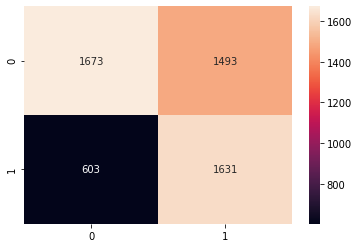

In [106]:
sns.heatmap(cm, annot= True, fmt= 'g')

In [110]:
#Applying K_fold cross-validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(classifier, X_train, y_train, cv= 10)

In [111]:
accuracies

array([0.6336689 , 0.63478747, 0.64765101, 0.63087248, 0.64597315,
       0.6442953 , 0.65100671, 0.64541387, 0.64541387, 0.65380313])

In [112]:
print(accuracies.mean(), accuracies.std())

0.6432885906040269 0.0072482876238578915


In [124]:
#Feature Selection
#Finding 20 best features for churn model
pd.concat([pd.DataFrame(X_train.columns, columns= ['Features']), pd.DataFrame(np.transpose(classifier.coef_), columns= ['Coeff'])], axis= 1)

,Features,Coeff
0,age,-0.167014
1,deposits,0.159372
2,withdrawal,0.052320
3,purchases_partners,-0.702433
4,purchases,-0.310320
5,cc_taken,0.086086
6,cc_recommended,0.080090
7,cc_disliked,-0.016842
8,cc_liked,0.028214
9,cc_application_begin,0.013468


In [126]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [128]:
classifier= LogisticRegression()
rfe= RFE(classifier, 20)
rfe.fit(X_train, y_train)


RFE(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                 fit_intercept=True, intercept_scaling=1,
                                 l1_ratio=None, max_iter=100,
                                 multi_class='auto', n_jobs=None, penalty='l2',
                                 random_state=None, solver='lbfgs', tol=0.0001,
                                 verbose=0, warm_start=False),
    n_features_to_select=20, step=1, verbose=0)

In [129]:
print(rfe.support_)

[ True  True  True  True  True  True  True False False False False  True
  True False  True  True  True  True  True  True  True  True False False
  True False False False  True False False False  True False False False
 False False False False False]


In [130]:
X_train.columns[rfe.support_]

Index(['age', 'deposits', 'withdrawal', 'purchases_partners', 'purchases',
       'cc_taken', 'cc_recommended', 'web_user', 'ios_user',
       'registered_phones', 'waiting_4_loan', 'cancelled_loan',
       'received_loan', 'rejected_loan', 'left_for_two_month_plus',
       'left_for_one_month', 'reward_rate', 'housing_R', 'payment_type_Weekly',
       'zodiac_sign_Capricorn'],
      dtype='object')

In [131]:
rfe.ranking_

array([ 1,  1,  1,  1,  1,  1,  1, 13,  7, 15, 14,  1,  1,  9,  1,  1,  1,
        1,  1,  1,  1,  1,  2, 12,  1,  5,  6,  4,  1, 16, 21,  8,  1, 11,
       10, 19,  3, 17, 18, 22, 20])

In [132]:
classifier= LogisticRegression()
classifier.fit(X_train[X_train.columns[rfe.support_]], y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [133]:
y_pred= classifier.predict(X_test[X_test.columns[rfe.support_]])

In [134]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, classification_report
cm= confusion_matrix(y_test, y_pred)
print(accuracy_score(y_test, y_pred))

0.6111111111111112


In [135]:
print(precision_score(y_test, y_pred))

0.5211891208096142


In [136]:
print(recall_score(y_test, y_pred))

0.7376902417188899


In [137]:
print(f1_score(y_test, y_pred))

0.6108228317272054


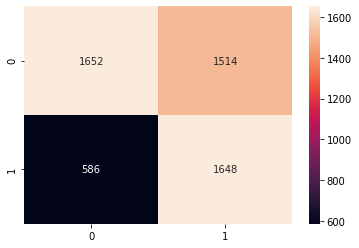

In [138]:
cm= confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot= True, fmt= 'g')

In [139]:
pd.concat([pd.DataFrame(X_train.columns[rfe.support_], columns= ['Features']), pd.DataFrame(np.transpose(classifier.coef_), columns= ['Coeff'])], axis= 1)

,Features,Coeff
0,age,-0.170046
1,deposits,0.174334
2,withdrawal,0.057786
3,purchases_partners,-0.691735
4,purchases,-0.321656
5,cc_taken,0.088074
6,cc_recommended,0.093721
7,web_user,0.150047
8,ios_user,0.085442
9,registered_phones,0.101780


In [148]:
#Finalise the results
final_results= pd.concat([y_test, user_identifier], axis= 1).dropna()
final_results['predicted_churn']= y_pred


In [149]:
final_results.head()

,churn,user,predicted_churn
4,1.0,61353,1
7,0.0,67679,0
8,0.0,21269,0
18,0.0,69531,1
22,0.0,25997,0


In [150]:
final_results= final_results[['user', 'churn', 'predicted_churn']].reset_index(drop= True)

In [151]:
final_results.head()

,user,churn,predicted_churn
0,61353,1.0,1
1,67679,0.0,0
2,21269,0.0,0
3,69531,0.0,1
4,25997,0.0,0
